DROPNA Method

In [132]:
import pandas as pd

In [133]:
import sklearn
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error
import numpy as np


In [134]:
df = pd.read_csv("house_prices_selection.csv")

In [135]:
df.shape

(1460, 32)

Spliting - numerical / categorical data

In [136]:
df_dropna = df.copy()

In [137]:
numerical_columns = df_dropna.select_dtypes(include=["number"]).columns.tolist()

In [138]:
categorical_columns = df_dropna.select_dtypes(include=["object", "category"]).columns.tolist()

In [139]:
print(numerical_columns)

['EVI', 'ZoningScore', 'Price_per_m^2', 'PDI', 'SalePrice', 'LotFrontage', 'LotArea', 'WoodDeckSF', 'OpenPorchSF', 'FullBath', 'GarageCars', 'GarageArea', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'GrLivArea', 'TotalBsmtSF', '1stFlrSF']


In [140]:
print(categorical_columns)

['KitchenQual', 'PavedDrive', 'BsmtQual', 'CentralAir', 'Foundation']


In [141]:
df_dropna.isnull().any()


EVI                  False
ZoningScore          False
MSZoning_RL          False
LotConfig_CulDSac    False
LandContour_HLS      False
LotShape_IR2         False
Condition1_Norm      False
Condition1_Feedr     False
LotShape_Reg         False
MSZoning_RM          False
Price_per_m^2        False
PDI                  False
SalePrice            False
LotFrontage           True
LotArea              False
WoodDeckSF           False
OpenPorchSF          False
FullBath             False
GarageCars           False
GarageArea           False
KitchenQual          False
PavedDrive           False
OverallQual          False
YearBuilt            False
YearRemodAdd         False
MasVnrArea            True
GrLivArea            False
TotalBsmtSF          False
1stFlrSF             False
BsmtQual              True
CentralAir           False
Foundation           False
dtype: bool

In [142]:
df_dropna.isnull().sum()


EVI                    0
ZoningScore            0
MSZoning_RL            0
LotConfig_CulDSac      0
LandContour_HLS        0
LotShape_IR2           0
Condition1_Norm        0
Condition1_Feedr       0
LotShape_Reg           0
MSZoning_RM            0
Price_per_m^2          0
PDI                    0
SalePrice              0
LotFrontage          259
LotArea                0
WoodDeckSF             0
OpenPorchSF            0
FullBath               0
GarageCars             0
GarageArea             0
KitchenQual            0
PavedDrive             0
OverallQual            0
YearBuilt              0
YearRemodAdd           0
MasVnrArea             8
GrLivArea              0
TotalBsmtSF            0
1stFlrSF               0
BsmtQual              37
CentralAir             0
Foundation             0
dtype: int64

In [143]:

df_dropna = df_dropna.dropna(axis=0)

In [144]:
df_dropna.isnull().sum()


EVI                  0
ZoningScore          0
MSZoning_RL          0
LotConfig_CulDSac    0
LandContour_HLS      0
LotShape_IR2         0
Condition1_Norm      0
Condition1_Feedr     0
LotShape_Reg         0
MSZoning_RM          0
Price_per_m^2        0
PDI                  0
SalePrice            0
LotFrontage          0
LotArea              0
WoodDeckSF           0
OpenPorchSF          0
FullBath             0
GarageCars           0
GarageArea           0
KitchenQual          0
PavedDrive           0
OverallQual          0
YearBuilt            0
YearRemodAdd         0
MasVnrArea           0
GrLivArea            0
TotalBsmtSF          0
1stFlrSF             0
BsmtQual             0
CentralAir           0
Foundation           0
dtype: int64

In [145]:
df_dropna.shape

(1164, 32)

In [146]:
X_dropna = df_dropna.drop('SalePrice', axis=1)
y_dropna = df_dropna['SalePrice']


In [147]:
X_train, X_test, y_train, y_test = train_test_split(
    X_dropna, y_dropna, test_size=0.2, random_state=42
)

In [148]:
numerical_features = X_train.select_dtypes(include=["number"]).columns.tolist()
categorical_features = X_train.select_dtypes(include=["object", "category"]).columns.tolist()

In [149]:
categorical_transformer = Pipeline([
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])






In [150]:
preprocessor = ColumnTransformer([
    ('num', 'passthrough', numerical_features),
    ('cat', categorical_transformer, categorical_features)
])

In [151]:
model = Pipeline([
    ('preprocess', preprocessor),
    ('regressor', LinearRegression())
])

In [152]:

model.fit(X_train, y_train)
predictions = model.predict(X_test)

In [153]:
rmse_dropna = np.sqrt(mean_squared_error(y_test, predictions))
print("RMSE:", rmse_dropna)

RMSE: 35777.823749415664


SimpleImputer Method

In [154]:
df_simple_imputer = df.copy()

In [155]:
df.shape

(1460, 32)

In [156]:
df_simple_imputer.shape

(1460, 32)

In [157]:
df.isnull().sum()


EVI                    0
ZoningScore            0
MSZoning_RL            0
LotConfig_CulDSac      0
LandContour_HLS        0
LotShape_IR2           0
Condition1_Norm        0
Condition1_Feedr       0
LotShape_Reg           0
MSZoning_RM            0
Price_per_m^2          0
PDI                    0
SalePrice              0
LotFrontage          259
LotArea                0
WoodDeckSF             0
OpenPorchSF            0
FullBath               0
GarageCars             0
GarageArea             0
KitchenQual            0
PavedDrive             0
OverallQual            0
YearBuilt              0
YearRemodAdd           0
MasVnrArea             8
GrLivArea              0
TotalBsmtSF            0
1stFlrSF               0
BsmtQual              37
CentralAir             0
Foundation             0
dtype: int64

In [158]:
df_simple_imputer.isnull().sum()


EVI                    0
ZoningScore            0
MSZoning_RL            0
LotConfig_CulDSac      0
LandContour_HLS        0
LotShape_IR2           0
Condition1_Norm        0
Condition1_Feedr       0
LotShape_Reg           0
MSZoning_RM            0
Price_per_m^2          0
PDI                    0
SalePrice              0
LotFrontage          259
LotArea                0
WoodDeckSF             0
OpenPorchSF            0
FullBath               0
GarageCars             0
GarageArea             0
KitchenQual            0
PavedDrive             0
OverallQual            0
YearBuilt              0
YearRemodAdd           0
MasVnrArea             8
GrLivArea              0
TotalBsmtSF            0
1stFlrSF               0
BsmtQual              37
CentralAir             0
Foundation             0
dtype: int64

In [159]:

X = df_simple_imputer.drop('SalePrice', axis=1)  
y = df_simple_imputer['SalePrice']               




In [160]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [161]:
numerical_columns = X_train.select_dtypes(include=["number"]).columns.tolist()
categorical_columns = X_train.select_dtypes(include=["object", "category"]).columns.tolist()


In [162]:
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean'))
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

In [163]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_columns),
        ('cat', categorical_transformer, categorical_columns)
    ]
)


In [164]:

model = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('regressor', LinearRegression())
])


In [165]:
model.fit(X_train, y_train)
predictions = model.predict(X_test)


In [166]:
rmse_simple_imputer = np.sqrt(mean_squared_error(y_test, predictions))
print("RMSE:", rmse_simple_imputer)

RMSE: 33925.979571605385


Conclusions

In [167]:
print(rmse_dropna)

35777.823749415664


In [168]:
print(rmse_simple_imputer)

33925.979571605385


In conclusion, the method using SimpleImputer performed better, because the RMSE is lower, meaning it is closer to the real values. It is also a better method than using the dropna one, because it doesn't remove missing data, but uses values to fill them (no data from the original dataset is lost, which helps the RMSE to stay low).

LAB - November 18th. Adding DecisionTreeRegressor and RandomForestRegressor + Cross Validation (GridSearch). Comparing all 3 models (Linear Regresion, DecisionTreeRegressor and RandomForestRegressor).

In [169]:
df = pd.read_csv("house_prices_selection.csv")

In [170]:
df_backup = df.copy()


In [171]:
df_backup.shape

(1460, 32)

In [172]:
X = df_backup.drop('SalePrice', axis=1)  
y = df_backup['SalePrice']


In [173]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [174]:
numerical_columns = X_train.select_dtypes(include=["number"]).columns.tolist()
categorical_columns = X_train.select_dtypes(include=["object", "category"]).columns.tolist()


In [175]:
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean'))
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

In [176]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_columns),
        ('cat', categorical_transformer, categorical_columns)
    ]
)


In [177]:
from sklearn.tree import DecisionTreeRegressor


In [178]:
decision_tree_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),          
    ('regressor', DecisionTreeRegressor(random_state=42))
])

In [179]:
decision_tree_pipeline.fit(X_train, y_train)


,steps,"[('preprocessor', ...), ('regressor', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [180]:
decision_tree_predictions = decision_tree_pipeline.predict(X_test)


In [181]:
y_pred = decision_tree_pipeline.predict(X_test)


In [182]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [183]:
rmse_decision_tree = np.sqrt(mean_squared_error(y_test, y_pred))
mae_decision_tree = mean_absolute_error(y_test, y_pred)
r2_decision_tree = r2_score(y_test, y_pred)

print("RMSE:", rmse_decision_tree)
print("MAE:", mae_decision_tree)
print("R²:", r2_decision_tree)

RMSE: 33311.39541688194
MAE: 21482.640410958906
R²: 0.855332219954333


Hyperparameter tuning - DecisionTree

In [184]:
"""
param_grid_dt = {
    # Limitează cât de adânc poate crește arborele pentru a evita memorarea
    'regressor__max_depth': [None, 5, 10, 15, 20], #primele 2 
    
    # Numărul minim de mostre necesare pentru a împărți un nod intern
    'regressor__min_samples_split': [2, 5, 10], #primele 2
    
    # Cel mai important pentru regularizare: numărul minim de mostre într-o frunză
    'regressor__min_samples_leaf': [1, 2, 4, 8], #primele 2
    
    # Câte feature-uri să ia în calcul la fiecare split (reduce varianța)
    'regressor__max_features': ['sqrt', 'log2', None], # pastrez una
    
    # Funcția de măsurare a calității split-ului
    'regressor__criterion': ['squared_error'] # pastrez una 
    
# de sters None

"""

"\nparam_grid_dt = {\n    # Limitează cât de adânc poate crește arborele pentru a evita memorarea\n    'regressor__max_depth': [None, 5, 10, 15, 20], #primele 2 \n\n    # Numărul minim de mostre necesare pentru a împărți un nod intern\n    'regressor__min_samples_split': [2, 5, 10], #primele 2\n\n    # Cel mai important pentru regularizare: numărul minim de mostre într-o frunză\n    'regressor__min_samples_leaf': [1, 2, 4, 8], #primele 2\n\n    # Câte feature-uri să ia în calcul la fiecare split (reduce varianța)\n    'regressor__max_features': ['sqrt', 'log2', None], # pastrez una\n\n    # Funcția de măsurare a calității split-ului\n    'regressor__criterion': ['squared_error'] # pastrez una \n\n# de sters None\n\n"

In [185]:
# adjusting/choosing the parameters
param_grid_dt = {
    # Limitează cât de adânc poate crește arborele pentru a evita memorarea
    'regressor__max_depth': [5, 10],
    
    # Numărul minim de mostre necesare pentru a împărți un nod intern
    'regressor__min_samples_split': [2, 5],
    
    # Cel mai important pentru regularizare: numărul minim de mostre într-o frunză
    'regressor__min_samples_leaf': [1, 2],
    
    # Câte feature-uri să ia în calcul la fiecare split (reduce varianța)
    'regressor__max_features': ['sqrt'],
    
    # Funcția de măsurare a calității split-ului
    'regressor__criterion': ['squared_error'] 
} 





In [186]:
from sklearn.model_selection import GridSearchCV


In [187]:
grid_dt = GridSearchCV(
    estimator=decision_tree_pipeline,
    param_grid=param_grid_dt,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=1
)


In [188]:
grid_dt.fit(X_train, y_train)

,estimator,Pipeline(step...m_state=42))])
,param_grid,"{'regressor__criterion': ['squared_error'], 'regressor__max_depth': [5, 10], 'regressor__max_features': ['sqrt'], 'regressor__min_samples_leaf': [1, 2], ...}"
,scoring,'neg_mean_squared_error'
,n_jobs,1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,transformers,"[('num', ...), ('cat', ...)]"


In [189]:
print("Optimal Decision Tree parameters:", grid_dt.best_params_)


Optimal Decision Tree parameters: {'regressor__criterion': 'squared_error', 'regressor__max_depth': 10, 'regressor__max_features': 'sqrt', 'regressor__min_samples_leaf': 2, 'regressor__min_samples_split': 2}


In [190]:
y_pred_dt_best = grid_dt.predict(X_test)


In [191]:
rmse_decision_tree_tuned = np.sqrt(mean_squared_error(y_test, y_pred_dt_best))
mae_decision_tree_tuned = mean_absolute_error(y_test, y_pred_dt_best)
r2_decision_tree_tuned = r2_score(y_test, y_pred_dt_best)

In [192]:
print("Decision Tree - tuned - RMSE:",rmse_decision_tree_tuned)
print("Decision Tree - tuned - MAE:",mae_decision_tree_tuned)
print("Decision Tree - tuned - R2:", r2_decision_tree_tuned)

Decision Tree - tuned - RMSE: 39485.37755365791
Decision Tree - tuned - MAE: 26115.958851228843
Decision Tree - tuned - R2: 0.7967368012205225


RANDOM FOREST

In [193]:
from sklearn.ensemble import RandomForestRegressor


In [194]:
random_forest_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])

In [195]:
random_forest_pipeline.fit(X_train, y_train)


,steps,"[('preprocessor', ...), ('regressor', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [196]:
y_pred = random_forest_pipeline.predict(X_test)


In [197]:
rmse_random_forest = np.sqrt(mean_squared_error(y_test, y_pred))
mae_random_forest = mean_absolute_error(y_test, y_pred)
r2_random_forest = r2_score(y_test, y_pred)

print("Random Forest - RMSE:", rmse_random_forest)
print("Random Forest - MAE:", mae_random_forest)
print("Random Forest - R2:", r2_random_forest)

Random Forest - RMSE: 27705.792144116458
Random Forest - MAE: 16296.519760273974
Random Forest - R2: 0.8999246058643854


Hyperparameter tuning - RandomForestRegressor

In [198]:
"""
param_grid_rf = {
    # Numărul de arbori (mai mulți sunt de obicei mai buni, dar durează mai mult)
    'regressor__n_estimators': [100, 300, 500],
    
    # Adâncimea maximă a fiecărui arbore
    'regressor__max_depth': [None, 10, 20, 30],
    
    # Previne crearea de frunze cu prea puține date (ex: o singură casă cu preț atipic)
    'regressor__min_samples_leaf': [1, 2, 4],
    
    # Câte date sunt necesare pentru un nou split
    'regressor__min_samples_split': [2, 5, 10],
    
    # Critic pentru Random Forest: 'sqrt' este adesea cel mai bun pentru a decorrela arborii
    'regressor__max_features': ['sqrt', 'log2', None],
   
    # Dacă folosim bootstrapping (eșantionare cu înlocuire)
    'regressor__bootstrap': [True]
}
"""

"\nparam_grid_rf = {\n    # Numărul de arbori (mai mulți sunt de obicei mai buni, dar durează mai mult)\n    'regressor__n_estimators': [100, 300, 500],\n\n    # Adâncimea maximă a fiecărui arbore\n    'regressor__max_depth': [None, 10, 20, 30],\n\n    # Previne crearea de frunze cu prea puține date (ex: o singură casă cu preț atipic)\n    'regressor__min_samples_leaf': [1, 2, 4],\n\n    # Câte date sunt necesare pentru un nou split\n    'regressor__min_samples_split': [2, 5, 10],\n\n    # Critic pentru Random Forest: 'sqrt' este adesea cel mai bun pentru a decorrela arborii\n    'regressor__max_features': ['sqrt', 'log2', None],\n\n    # Dacă folosim bootstrapping (eșantionare cu înlocuire)\n    'regressor__bootstrap': [True]\n}\n"

In [199]:
# adjusting parameters

param_grid_rf = {
    # Numărul de arbori (mai mulți sunt de obicei mai buni, dar durează mai mult)
    'regressor__n_estimators': [100, 300],
    
    # Adâncimea maximă a fiecărui arbore
    'regressor__max_depth': [ 10, 20],
    
    # Previne crearea de frunze cu prea puține date (ex: o singură casă cu preț atipic)
    'regressor__min_samples_leaf': [1, 2],
    
    # Câte date sunt necesare pentru un nou split
    'regressor__min_samples_split': [2, 5],
    
    # Critic pentru Random Forest: 'sqrt' este adesea cel mai bun pentru a decorrela arborii
    'regressor__max_features': ['sqrt'],
   
    # Dacă folosim bootstrapping (eșantionare cu înlocuire)
    'regressor__bootstrap': [True]
}

In [200]:
grid_rf = GridSearchCV(
    estimator=random_forest_pipeline,
    param_grid=param_grid_rf,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=1 )

In [201]:
grid_rf.fit(X_train, y_train)


,estimator,Pipeline(step...m_state=42))])
,param_grid,"{'regressor__bootstrap': [True], 'regressor__max_depth': [10, 20], 'regressor__max_features': ['sqrt'], 'regressor__min_samples_leaf': [1, 2], ...}"
,scoring,'neg_mean_squared_error'
,n_jobs,1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,transformers,"[('num', ...), ('cat', ...)]"


In [202]:
print("Optimal parameters:", grid_rf.best_params_)


Optimal parameters: {'regressor__bootstrap': True, 'regressor__max_depth': 20, 'regressor__max_features': 'sqrt', 'regressor__min_samples_leaf': 1, 'regressor__min_samples_split': 2, 'regressor__n_estimators': 300}


In [203]:
y_pred_rf_best = grid_rf.predict(X_test)


In [204]:
rmse_rf_tuned = np.sqrt(mean_squared_error(y_test, y_pred_rf_best))
mae_rf_tuned = mean_absolute_error(y_test, y_pred_rf_best)
r2_rf_tuned = r2_score(y_test, y_pred_rf_best)

In [205]:
print("Random Forest - tuned - RMSE:", rmse_rf_tuned)
print("Random Forest - tuned - MAE:", mae_rf_tuned)
print("Random Forest - tuned - R2:", r2_rf_tuned)

Random Forest - tuned - RMSE: 27399.965182365624
Random Forest - tuned - MAE: 16321.287355386632
Random Forest - tuned - R2: 0.90212175183744


Comparison between the 3 models (Linear Regression, Decision Tree, Random Forest)

In [206]:

print(" Linear Model - RMSE:", rmse_simple_imputer)

 Linear Model - RMSE: 33925.979571605385


In [207]:
#I added MAE abd R2 score for the Linear Regression model, so I can compare it to the other two; I only had the results for the RMSE 'til now.

mae_simple_imputer = mean_absolute_error(y_test, predictions)
print(" Linear Model - MAE:", mae_simple_imputer)



 Linear Model - MAE: 21538.231889169117


In [208]:

r2_simple_imputer = r2_score(y_test, predictions)
print(" Linear Model - R2:", r2_simple_imputer)

 Linear Model - R2: 0.849944831705525


In [209]:
print("Decision Tree - RMSE:", rmse_decision_tree)
print("Decision Tree - MAE:", mae_decision_tree)
print("Decision Tree - R2:", r2_decision_tree)

Decision Tree - RMSE: 33311.39541688194
Decision Tree - MAE: 21482.640410958906
Decision Tree - R2: 0.855332219954333


In [210]:
print("Decision Tree - tuned - RMSE:",rmse_decision_tree_tuned)
print("Decision Tree - tuned - MAE:",mae_decision_tree_tuned)
print("Decision Tree - tuned - R2:", r2_decision_tree_tuned)

Decision Tree - tuned - RMSE: 39485.37755365791
Decision Tree - tuned - MAE: 26115.958851228843
Decision Tree - tuned - R2: 0.7967368012205225


In [211]:
print("Random Forest - RMSE:", rmse_random_forest)
print("Random Forest - MAE:", mae_random_forest)
print("Random Forest - R2:", r2_random_forest)

Random Forest - RMSE: 27705.792144116458
Random Forest - MAE: 16296.519760273974
Random Forest - R2: 0.8999246058643854


In [212]:
print("Random Forest - tuned - RMSE:", rmse_rf_tuned)
print("Random Forest - tuned - MAE:", mae_rf_tuned)
print("Random Forest - tuned - R2:", r2_rf_tuned)

Random Forest - tuned - RMSE: 27399.965182365624
Random Forest - tuned - MAE: 16321.287355386632
Random Forest - tuned - R2: 0.90212175183744


In what accounts the Linear Regression Model (the Simple Imputer version - chosen because it performed better than the Dropna method), I can say it brought one of the worst results.

Decision Tree: the hypertuned results were worse than the initial ones before hypertuning. RMSE and MAE increased and R2 decreased, it could suggest overfitting or that the hyperparameters were not the best choices, this could make sense as I reduced some values so the model could run in a reasonable amount of time and not hours, for example. The tuned version of the Decision Tree fared worse than the Linear Regression.

Random Forest: the initial results and the ones after the hypertuning the Random Forest model were pretty similar, but if we were to choose, the tuned one is the best model of the two and even compared to the other models - Linear Regression, Decision Tree.

LAB - November 19th. Adding XGBoost, LightGBM, CatBoost (no One-Hot Encoding needed for CatBoost). Checking all 3 models' performances and using visual representations for this (barplot).

XGBoost

In [213]:
pip install xgboost


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [214]:
from xgboost import XGBRegressor
from sklearn . metrics import mean_squared_error


In [215]:
xgb_model = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('regressor', XGBRegressor(
        n_estimators=500,
        learning_rate=0.05,
        max_depth=6,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42
    ))
])



In [216]:
xgb_model.fit (X_train, y_train)
y_pred = xgb_model.predict(X_test)

In [217]:
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred))
mae_xgb = mean_absolute_error(y_test, y_pred)
r2_xgb = r2_score(y_test, y_pred)

In [218]:
print ("XGBoost - RMSE:", rmse_xgb)
print ("XGBoost - MAE:", mae_xgb)
print ("XGBoost - R2:", r2_xgb)

XGBoost - RMSE: 19153.410140233515
XGBoost - MAE: 11348.9296875
XGBoost - R2: 0.9521723985671997


Until now, XGBoost had the best results

LightGBM

In [219]:
pip install lightgbm 

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [220]:
from lightgbm import LGBMRegressor

In [221]:
lgbm_model = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('regressor', LGBMRegressor(
        n_estimators=500,
        learning_rate=0.05,
        max_depth=-1,
        num_leaves=31,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42
    ))
]

)

In [222]:
lgbm_model.fit(X_train, y_train)
y_pred = lgbm_model.predict(X_test)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000342 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2725
[LightGBM] [Info] Number of data points in the train set: 1168, number of used features: 35
[LightGBM] [Info] Start training from score 181441.541952


e:\Python\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


In [223]:
rmse_lightgbm = np.sqrt(mean_squared_error(y_test, y_pred))
mae_lightgbm = mean_absolute_error(y_test, y_pred)
r2_lightgbm = r2_score(y_test, y_pred)

In [224]:
print ("LightGBM  - RMSE:", rmse_lightgbm)
print ("LightGBM - MAE:", mae_lightgbm)
print ("LightGBM  - R2:", r2_lightgbm)

LightGBM  - RMSE: 21380.491281333412
LightGBM - MAE: 11377.56496481884
LightGBM  - R2: 0.9404033941864368


LightGBM performed better than the previous models, except XGBoost.

CatBoost

In [225]:
pip install catboost

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [226]:
from catboost import CatBoostRegressor

In [227]:
categorical_columns = X_train.select_dtypes(include=["object", "category"]).columns.tolist()


In [228]:
#I kept getting errors when fitting the model, so I used this to deal with the missing data in the categorical columns, before fitting the model again:
for col in categorical_columns:
    X_train[col] = X_train[col].fillna("Missing")
    X_test[col] = X_test[col].fillna("Missing")

In [229]:

cat_features_indices = [X_train.columns.get_loc(col) for col in categorical_columns]


In [230]:
cat_model =CatBoostRegressor(
    iterations=500,
    learning_rate=0.05,
    depth=6,
    loss_function="RMSE",
    verbose=False, 
    random_state=42
)

In [231]:
cat_model.fit(X_train, y_train, cat_features = cat_features_indices)
y_pred = cat_model.predict(X_test)


In [232]:
rmse_catboost = np.sqrt(mean_squared_error(y_test, y_pred))
mae_catboost = mean_absolute_error(y_test, y_pred)
r2_catboost = r2_score(y_test, y_pred)

In [233]:
print("CatBoost - RMSE:", rmse_catboost)
print("CatBoost - MAE:", mae_catboost)
print("CatBoost - R2:", r2_catboost)

CatBoost - RMSE: 19028.226282120122
CatBoost - MAE: 10959.702165946575
CatBoost - R2: 0.9527955675334508


CatBoost fared even better than all the previous models.

In [234]:
models_performance = {
    "Model": [
        "Linear Regression",
        "Decision Tree",
        "Decision Trees - tuned",
        "Random Forest",
        "Random Forest - tuned",
        "XGBoost", 
        "LightGBM",
        "CatBoost"



    ],
    "RMSE": [
        rmse_simple_imputer,
        rmse_decision_tree,
        rmse_decision_tree_tuned,
        rmse_random_forest,
        rmse_rf_tuned,
        rmse_xgb, 
        rmse_lightgbm,
        rmse_catboost

        
      
    ],
    "MAE": [
        mae_simple_imputer,
        mae_decision_tree,
        mae_decision_tree_tuned,
        mae_random_forest,
        mae_rf_tuned,
        mae_xgb, 
        mae_lightgbm,
        mae_catboost

    ],
    "R²": [
        r2_simple_imputer,
        r2_decision_tree,
        r2_decision_tree_tuned,
        r2_random_forest,
        r2_rf_tuned,
        r2_xgb, 
        r2_lightgbm,
        r2_catboost

    ]
}

In [235]:
df_models_performance = pd.DataFrame(models_performance)

In [236]:
print(df_models_performance)

                    Model          RMSE           MAE        R²
0       Linear Regression  33925.979572  21538.231889  0.849945
1           Decision Tree  33311.395417  21482.640411  0.855332
2  Decision Trees - tuned  39485.377554  26115.958851  0.796737
3           Random Forest  27705.792144  16296.519760  0.899925
4   Random Forest - tuned  27399.965182  16321.287355  0.902122
5                 XGBoost  19153.410140  11348.929688  0.952172
6                LightGBM  21380.491281  11377.564965  0.940403
7                CatBoost  19028.226282  10959.702166  0.952796


In [237]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

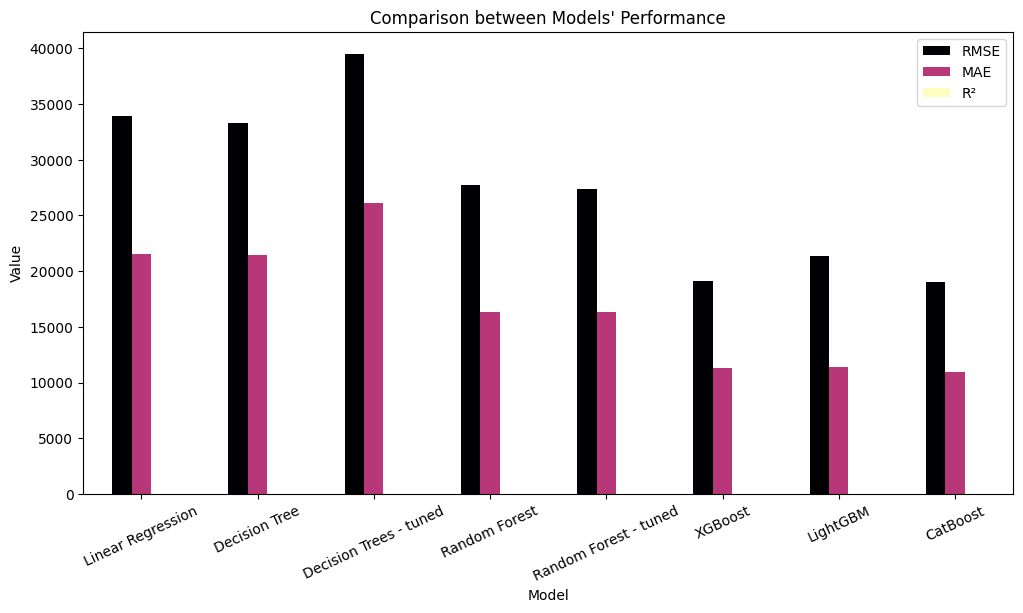

In [239]:
df_models_performance.set_index("Model")[["RMSE", "MAE","R²"]].plot(kind="bar", figsize=(12,6), colormap="magma")
plt.title("Comparison between Models' Performance")
plt.ylabel("Value")
plt.xticks(rotation=25)
plt.tight_layout
plt.show()

The R² values are not visible on the barplot, because the value are very small compared to all the other values, thus I added a heatmap as well to be able to make a better comparison and see the subtle differences between XGBoost and CatBoost results.

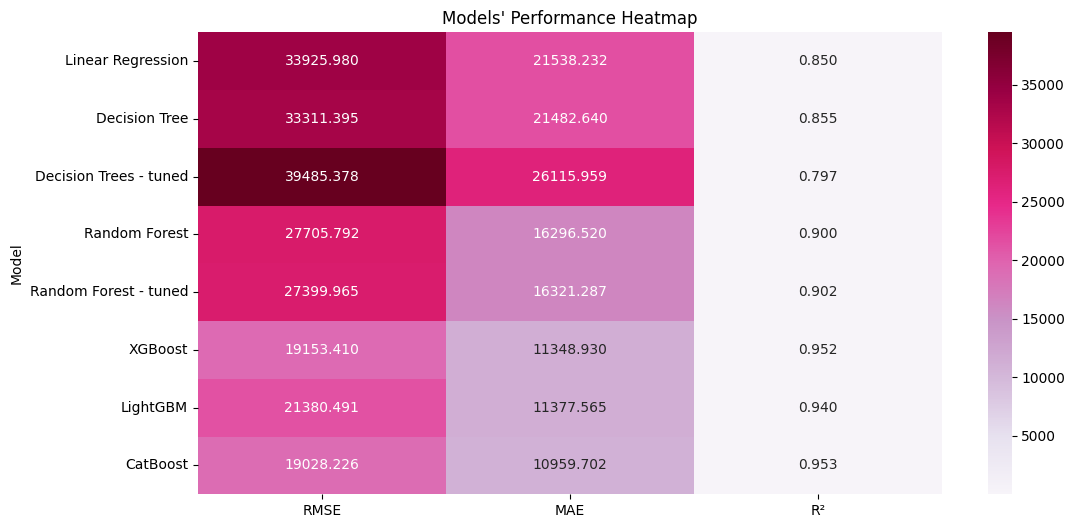

In [241]:
import seaborn as sns
plt.figure(figsize=(12,6))
sns.heatmap(
    df_models_performance.set_index("Model"),
    annot=True,
    cmap="PuRd",
    fmt=".3f")
plt.title("Models' Performance Heatmap")
plt.show()


Conclusions

We want the RMSE and MAE to be as low as possible and the determination coefficient (R²) as closest to 1 as possible - this shows how well the model fits the data by explaining the variance in the target variable.

The model that has the best results is CatBoost.

Before adding the gradient boosting libraries (XGBoost, LightGBM and CatBoost), the tuned version of the Random Forest held the best results. After adding the forementioned gradient boosting frameworks, CatBoost outperformed all of the other models.